In [1]:
from dask.distributed import Client
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
client = Client(n_workers=2, threads_per_worker=2, memory_limit='1GB')
client

Client Scheduler: tcp://127.0.0.1:42570 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 4 Memory: 2.00 GB


In [3]:
path_daily='/shared/obs/gridded/CPC-PRECIP-CONUS/daily/'
files_daily='precip.V1.0.*.nc'

In [4]:
ds_daily=xr.open_mfdataset(path_daily+files_daily,
                           concat_dim='time',combine='nested',
                          chunks={'lat': 25, 'lon': 25, 'time': -1},
                          parallel=True)
ds_daily

,Array,Chunk
Bytes,3.10 GB,915.00 kB
Shape,"(21550, 120, 300)","(366, 25, 25)"
Count,7139 Tasks,3540 Chunks
Type,float32,numpy.ndarray


In [5]:
ds_daily_climo=ds_daily.groupby('time.dayofyear').mean()
ds_daily_climo

,Array,Chunk
Bytes,52.70 MB,2.50 kB
Shape,"(366, 120, 300)","(1, 25, 25)"
Count,3075359 Tasks,21960 Chunks
Type,float32,numpy.ndarray


Text(0.5, 1.0, 'CPC Precipitation')

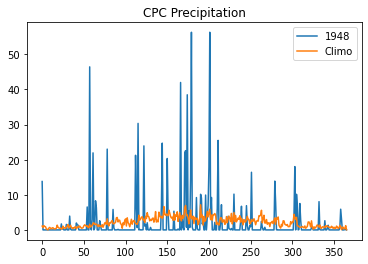

In [6]:
daily_pt=ds_daily['precip'].sel(lat=39,lon=360-97,method='nearest')
daily_ptclimo=ds_daily_climo['precip'].sel(lat=39,lon=360-97,method='nearest')
daily_pt1948=daily_pt.sel(time=slice('1948-01-01','1948-12-31'))

plt.plot(daily_pt1948)
plt.plot(daily_ptclimo)
plt.legend(['1948','Climo'])
plt.title('CPC Precipitation')

In [7]:
ds_daily_climo=ds_daily_climo.chunk({'dayofyear':-1})
daily_climo_smooth=ds_daily_climo.rolling(dayofyear=30,center=True).mean()

In [8]:
ds_smoothpt=daily_climo_smooth['precip'].sel(lat=39,lon=360-97,method='nearest')

Text(0.5, 1.0, 'CPC Precipitation')

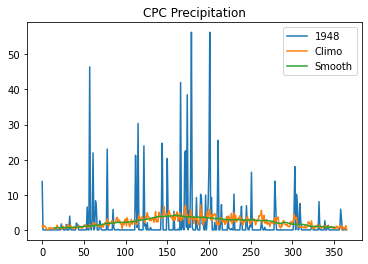

In [9]:
plt.plot(daily_pt1948)
plt.plot(daily_ptclimo)
plt.plot(ds_smoothpt)
plt.legend(['1948','Climo','Smooth'])
plt.title('CPC Precipitation')